# **Module 2: Probability Distributions & Interference**

**PHY657 Statistics & Data Analysis**  
February 16, 2026
Breck Meagher (bnmeaghe@syr.edu)

In [2]:
%matplotlib widget
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('dark_background')
plt.close('all')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "DejaVu Serif",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

Consider $N$ variables $x_1,\cdot,x_N$ each of which has a uniform distribution over the interval [0,1]. Consider the distribution of:
$$
\bar{x}=\frac{1}{N}\sum_{i=1}^N x_i
$$

for $N=1,2,10$. Can you fit the distribution of $\bar{x}$ for N=10 with a Gaussian PDF?  

**For your lab report:**  
review the central limit theorem and its implication in statistics and give examples where the Gaussian PDF is appropriate.

---

## **Activity 2: Poisson distribution (mean & variance)**

Consider a Poisson process with rate parameter $\lambda$. The probability of observing $k$ events in a fixed interval is given by the Poisson distribution. 

---
1. **Write the Poisson probability mass function $p(k|\lambda)$**  
$$
\boxed{
p(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
}
$$



---
2. **Compute the expectation value $\langle k \rangle$.**

Definition of the expectation value:
$$
\langle k \rangle
    = \sum_{k=0}^\infty k \cdot p(k|\lambda)
$$

The $k=0$ term is zero, factor out $\lambda$:
\begin{align}
    &= \sum_{k=1}^\infty \frac{\lambda^k e^{-\lambda}}{(k-1)!} \\
    &= \sum_{k=1}^\infty \lambda e^{-\lambda} \frac{\lambda^{k-1}}{(k-1)!}
\end{align}

Let $j=k-1$ (re-index):
$$
    = \sum_{j=0}^\infty \lambda e^{-\lambda} \frac{\lambda^{j}}{j!}
$$

Apply the fact that $\sum_{j=0}^\infty \frac{\lambda^{j}}{j!} = e^\lambda$:
$$
\langle k \rangle
    = \lambda e^{-\lambda} e^\lambda = \boxed{\lambda}
$$




---
3. **Compute the variance $\text{Var}(k)$.**

Definition of variance:
$$
\text{Var}(k) = \langle k^2 \rangle - \langle k \rangle ^2
$$

We have to be clever, note that $\langle k^2 \rangle = \langle k(k-1) \rangle + \langle k \rangle$:

\begin{align}
\langle k(k-1) \rangle 
    &= \sum_{k=0}^\infty k(k-1)\frac{\lambda^k e^{-\lambda}}{k!} \\
    &= \sum_{k=2}^\infty       \frac{\lambda^k e^{-\lambda}}{(k-2)!} \\
    &= \sum_{k=2}^\infty \lambda^2 e^{-\lambda}\frac{\lambda^{k-2}}{(k-2)!} \\
    &= \lambda^2 e^{-\lambda}e^{\lambda} \\
    &= \lambda^2
\end{align}


Then we know:

\begin{align}
\langle k^2 \rangle 
    &= \langle k(k-1) \rangle + \langle k \rangle \\
    &= \lambda^2 + \lambda
\end{align}

Thus, the variance is:
\begin{align}
\text{Var}(k) = (\lambda^2 +\lambda) - \lambda^2 = \boxed{\lambda}
\end{align}






---
4. **Show explicitly that $\text{Var}(k)=\langle k \rangle$.**
From parts 2 and 3, we found:
$$
\text{Var}(k)=\langle k \rangle = \boxed{\lambda}
$$





---
6. **Briefly discuss the physical meaning of this result for counting experiments.**
In counting experiments (like photon detection), this result dictates the statistical uncertainty (shot noise).

The standard deviation is $\sigma =\sqrt{\lambda}$. The relative error is:
$$
\frac{\sigma }{\langle k\rangle }=\frac{\sqrt{\lambda}}{\lambda}=\frac{1}{\sqrt{\lambda}}
$$

This means that as the number of counts increases, the relative precision of the measurement improves. This is where the $1/\sqrt{N}$ scaling in experimental data collection comes from. 

---

## **Activity 7: Bayesian inference for Gaussian parameters**

Generate a data set with a single Gaussian random variable $x$ characterized by a mean $\mu$ and variance $\sigma^2$  

* Assume it models a data set for which we know $\sigma^2$ but we must infer $\mu$ from $N$ observations $\{x_n\}$. Develop and algorithm to implement a Bayesian inference of the mean $\mu$ for different $N$. Compare $\mu_N$ with $\mu_{ML}$.

* Now analyze the same data set with the assumotion that $\mu$ is known  and we need to infer $\sigma^2$. Follow the formalism described by Bishop on pages 97-99.

**For your lab report:** Explain the idea of a conjugate prior and how you can develop algoriths to implement Bayesian inference with an iterative process.

---
### 1. **Inferring $\mu$ when $\sigma^2$ is known**

Begin by comparing $\mu$ for different $N$ using data points generated from a Gaussian with $\mu=0.8$ and $\sigma^2=0.1$ as shown in Figure 2.12. The prior mean is set to 0, and the variance is 0.1 for both the prior and the likelihood function.

Assume a Gaussian prior for $\mu$:
$$
p(\mu) = \mathcal{N}(\mu_0, \sigma_0^2)
$$

with likelihood
$$
p(\mathbf{x}|\mu) = \prod_{n=1}^{N} \mathcal{N}(x_n | \mu, \sigma^2)
$$

Using the conjugate prior property, the posterior distribution is also Gaussian:
$$
p(\mu|\mathbf{x}) = \mathcal{N}(\mu_N, \sigma_N^2)
$$

with
$$
\sigma_N^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}}, \quad
\mu_N = \sigma_N^2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{N \bar{x}}{\sigma^2} \right)
$$

where $\bar{x}$ is the sample mean. Plotting the posterior for different $N$ shows how increasing data sharpens our estimate of $\mu$, and compares with the maximum likelihood estimate $\mu_\text{ML} = \bar{x}$.

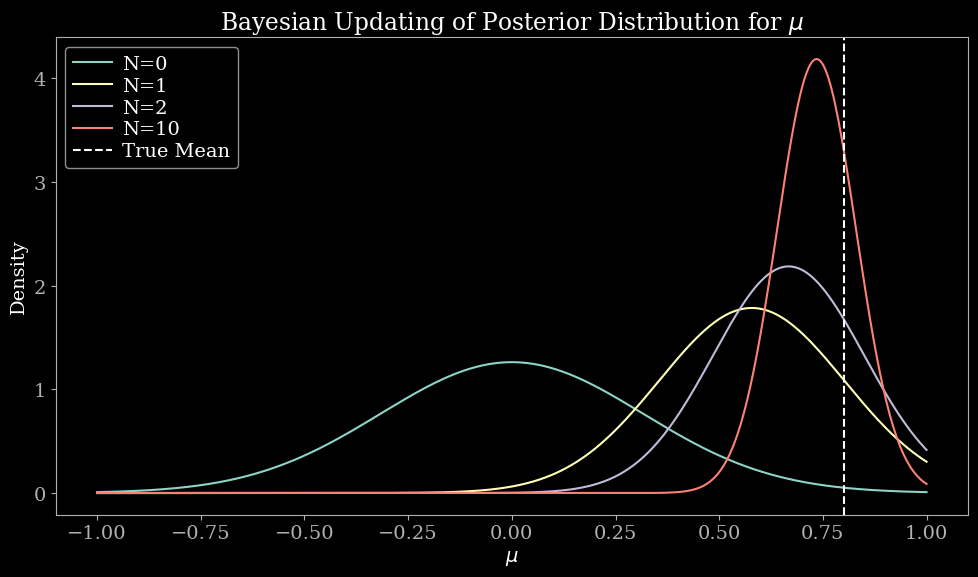

In [28]:
import scipy.stats as stats
plt.close('all')

# generate data set
np.random.seed(67)
true_mu = 0.8 # known mean used in fig 2.12
sigma2 = 0.1  # known variance used in fig 2.12
sigma = np.sqrt(sigma2)
N_values = [1, 2, 10]  # Different numbers of observations
data = np.random.normal(true_mu, sigma, max(N_values))

# prior beliefs
mu_0 = 0.0    # prior mean
sigma02 = 0.1 # prior variance = true variance here

# bayesian inference
def bayesian_inference(data, sigma2, mu_0, sigma02):
    N = len(data)
    sample_mean = np.mean(data)
    
    # posterior precision = prior precision + data precision
    # 1/sigmaN2 = 1/sigma02 + N/sigma2
    posterior_var = 1 / (1/sigma02 + N/sigma2)
    
    # posterior mean = weighted average of prior mean and sample mean
    posterior_mean = (mu_0/sigma02 + sample_mean*N/sigma2) * posterior_var
    
    return posterior_mean, posterior_var

results = []
for N in N_values:
    sub_data = data[:N]
    mu_N, var_N = bayesian_inference(sub_data, sigma2, mu_0, sigma02)
    mu_ML = np.mean(sub_data)
    results.append((N, mu_N, mu_ML))

# plotting the results
plt.figure(figsize=(10, 6))
mu_grid = np.linspace(-1, 1, 500)

plt.plot(mu_grid, stats.norm.pdf(mu_grid, mu_0, np.sqrt(sigma02)), label=f'N=0')

for N, m_n, v_n in [(r[0], r[1], bayesian_inference(data[:r[0]], sigma2, mu_0, sigma02)[1]) for r in results]:
    plt.plot(mu_grid, stats.norm.pdf(mu_grid, m_n, np.sqrt(v_n)), label=f'N={N}')

plt.axvline(true_mu, color='w', linestyle='--', label='True Mean')
plt.title(r'Bayesian Updating of Posterior Distribution for $\mu$')
plt.xlabel(r'$\mu$')
plt.ylabel('Density')
plt.legend()
plt.show()


### 2. **Inferring $\sigma^2$ when $\mu$ is known**

Assume an inverse gamma prior for $\sigma^2$:
$$
p(\sigma^2) = \text{Inv-Gamma}(\alpha_0, \beta_0)
$$

The likelihood is
$$
p(\mathbf{x}|\sigma^2) = \prod_{n=1}^{N} \mathcal{N}(x_n | \mu, \sigma^2)
$$

The posterior is also inverse gamma:
$$
p(\sigma^2|\mathbf{x}) = \text{Inv-Gamma}(\alpha_N, \beta_N)
$$

with updated parameters
$$
\alpha_N = \alpha_0 + \frac{N}{2}, \quad
\beta_N = \beta_0 + \frac{1}{2} \sum_{n=1}^{N} (x_n - \mu)^2
$$

The posterior mean of $\sigma^2$ is
$$
\mathbb{E}[\sigma^2|\mathbf{x}] = \frac{\beta_N}{\alpha_N - 1}
$$

Plot the posterior for different $N$ and compare with the maximum likelihood estimate
$$
\sigma^2_\text{ML} = \frac{1}{N} \sum_{n=1}^{N} (x_n - \mu)^2
$$

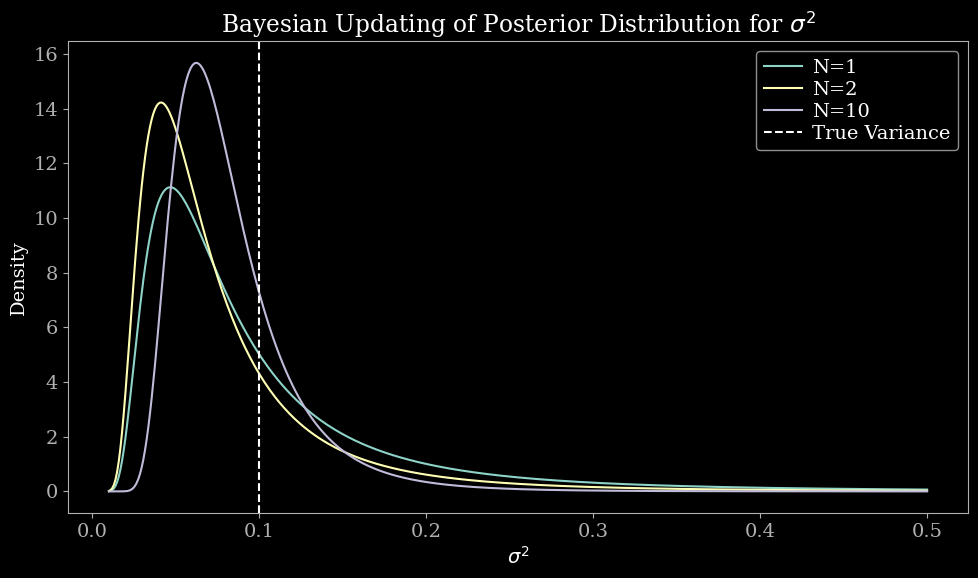

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma


# prior parameters for inverse gamma
alpha0 = 2.0
beta0 = 0.1

def bayesian_inference_sigma2(data, mu, alpha0, beta0):
    N = len(data)
    alpha_N = alpha0 + N/2
    beta_N = beta0 + 0.5 * np.sum((data - mu)**2)
    
    # posterior mean
    sigma2_post_mean = beta_N / (alpha_N - 1)
    
    return alpha_N, beta_N, sigma2_post_mean

sigma2_results = []
for N in N_values:
    sub_data = data[:N]
    alpha_N, beta_N, sigma2_post = bayesian_inference_sigma2(sub_data, true_mu, alpha0, beta0)
    sigma2_ML = np.mean((sub_data - true_mu)**2)
    sigma2_results.append((N, sigma2_post, sigma2_ML))

# plot posterior distributions
sigma2_grid = np.linspace(0.01, 0.5, 500)
plt.figure(figsize=(10,6))

for N, alpha_N, beta_N in [(r[0], *bayesian_inference_sigma2(data[:r[0]], true_mu, alpha0, beta0)[:2]) for r in sigma2_results]:
    plt.plot(sigma2_grid, invgamma.pdf(sigma2_grid, a=alpha_N, scale=beta_N), label=f'N={N}')

plt.axvline(sigma2, color='w', linestyle='--', label='True Variance')
plt.title(r'Bayesian Updating of Posterior Distribution for $\sigma^2$')
plt.xlabel(r'$\sigma^2$')
plt.ylabel('Density')
plt.legend()
plt.show()


### **Report:** Conjugate Priors and Iterative Bayesian Inference

A **conjugate prior** is a prior distribution chosen so that the posterior distribution belongs to the same family as the prior. This property simplifies Bayesian updating, because instead of recomputing the full posterior from scratch, we only need to update the prior's hyperparameters using the new data.

#### **Iterative Bayesian Inference**  

1. Initialize the prior with hyperparameters (e.g., $\mu_0$, $\sigma_0^2$ for a Gaussian prior, or $\alpha_0$, $\beta_0$ for an inverse gamma prior).  
2. Observe data one point or a batch at a time.  
3. Update hyperparameters using the likelihood of the new data:
   - For a Gaussian mean with known variance:
     $$
     \sigma_N^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}}, \quad
     \mu_N = \sigma_N^2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{N \bar{x}}{\sigma^2} \right)
     $$
   - For variance with known mean:
     $$
     \alpha_N = \alpha_0 + \frac{N}{2}, \quad
     \beta_N = \beta_0 + \frac{1}{2} \sum_{n=1}^N (x_n - \mu)^2
     $$
4. Repeat as more data arrives. The posterior from the previous step becomes the prior for the next step.



## **Activity 8: Prior sensitivity in Bayesian mean inference**

Using your Bayesian mean inference code from Activity 7:

### 1. **Repeat the inference using a narrow prior and a broad prior**

---

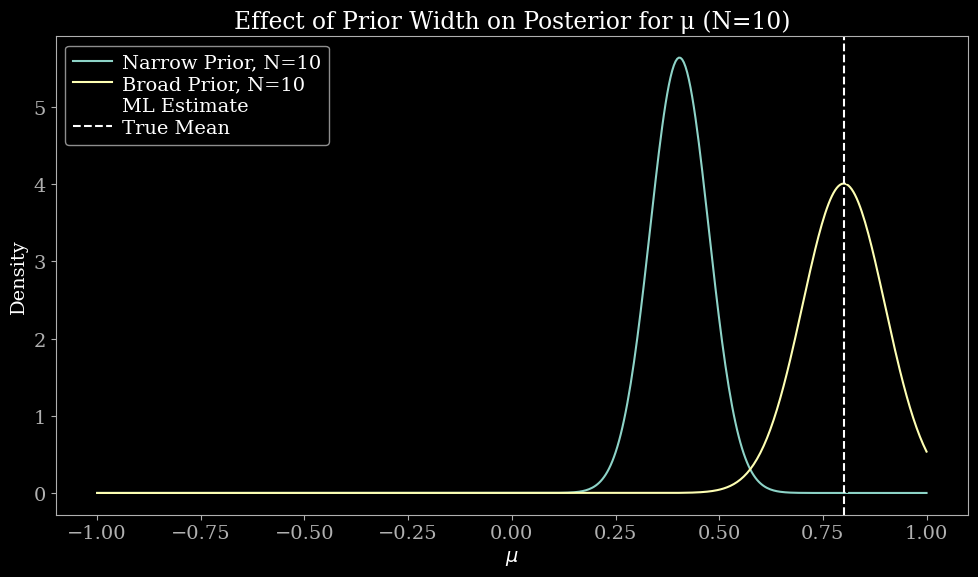

In [31]:
# compare Bayesian inference with narrow vs broad priors
plt.figure(figsize=(10,6))

# define priors
priors = [
    {"mu_0": 0.0, "sigma02": 0.01, "label": "Narrow Prior"},  # very confident prior
    {"mu_0": 0.0, "sigma02": 1.0,  "label": "Broad Prior"}    # very uncertain prior
]

# choose number of observations
N = 10
sub_data = data[:N]

# posterior plotting grid
mu_grid = np.linspace(-1, 1, 500)

for prior in priors:
    mu_N, var_N = bayesian_inference(sub_data, sigma2, prior["mu_0"], prior["sigma02"])
    plt.plot(mu_grid, stats.norm.pdf(mu_grid, mu_N, np.sqrt(var_N)), label=f'{prior["label"]}, N={N}')

# plot max likelihood estimate and true mean
mu_ML = np.mean(sub_data)
plt.axvline(mu_ML, color='k', linestyle='--', label='ML Estimate')
plt.axvline(true_mu, color='w', linestyle='--', label='True Mean')

plt.title(f'Effect of Prior Width on Posterior for μ (N={N})')
plt.xlabel(r'$\mu$')
plt.ylabel('Density')
plt.legend()
plt.show()


### 2. **Compare the resulting posterior means and variances**

---

In [35]:
# Compare posterior means and variances for narrow vs broad priors
N = 10
sub_data = data[:N]

print(f"{'Prior':<15} {'Posterior Mean':>15} {'Posterior Variance':>20}")

for prior in priors:
    mu_N, var_N = bayesian_inference(sub_data, sigma2, prior["mu_0"], prior["sigma02"])
    print(f"{prior['label']:<15} {mu_N:>15.4f} {var_N:>20.4f}")

# also print ML estimate for reference
mu_ML = np.mean(sub_data)
print(f"{'ML Estimate':<15} {mu_ML:>15.4f} {'-':>20}")


Prior            Posterior Mean   Posterior Variance
Narrow Prior             0.4042               0.0050
Broad Prior              0.8004               0.0099
ML Estimate              0.8084                    -


### 3. **Repeat the comparison for a larger dataset size.**

---

In [36]:
# larger dataset comparison
N_large = 50
sub_data_large = data[:N_large]

print(f"{'Prior':<15} {'Posterior Mean':>15} {'Posterior Variance':>20}")

for prior in priors:
    mu_N, var_N = bayesian_inference(sub_data_large, sigma2, prior["mu_0"], prior["sigma02"])
    print(f"{prior['label']:<15} {mu_N:>15.4f} {var_N:>20.4f}")

# also print ML estimate for reference
mu_ML_large = np.mean(sub_data_large)
print(f"{'ML Estimate':<15} {mu_ML_large:>15.4f} {'-':>20}")


Prior            Posterior Mean   Posterior Variance
Narrow Prior             0.4042               0.0050
Broad Prior              0.8004               0.0099
ML Estimate              0.8084                    -


### 4. **Discuss how the influence of the prior changes as $N$ increases.**  

---
In Bayesian inference, the posterior distribution is a combination of the prior and the likelihood from the observed data.  

* **Small $N$ (few observations):**  
  The prior has a strong influence on the posterior. A narrow prior (small variance) can pull the posterior mean toward the prior mean, while a broad prior allows the data to dominate more.  

* **Large $N$ (many observations):**  
  The contribution from the data grows proportionally to $N$, eventually overpowering the prior. The posterior mean approaches the sample mean (the maximum likelihood estimate), and the posterior variance decreases, reflecting greater confidence.  

In summary, as $N$ increases, the influence of the prior diminishes, and the posterior is increasingly determined by the observed data. This shows how Bayesian updating is "self-correcting," because the data “overrides” prior beliefs when enough evidence is available.
